Importing Dependencies

In [293]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Importing data set to pandas library

In [294]:
emp_data = pd.read_csv('/content/Employee Attrition.zip')

In [295]:
emp_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [296]:
#Illustrating columns
emp_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [297]:
#checking rows and columns
emp_data.shape

(1470, 35)

In [298]:
#Information on data
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [299]:
emp_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

<Axes: >

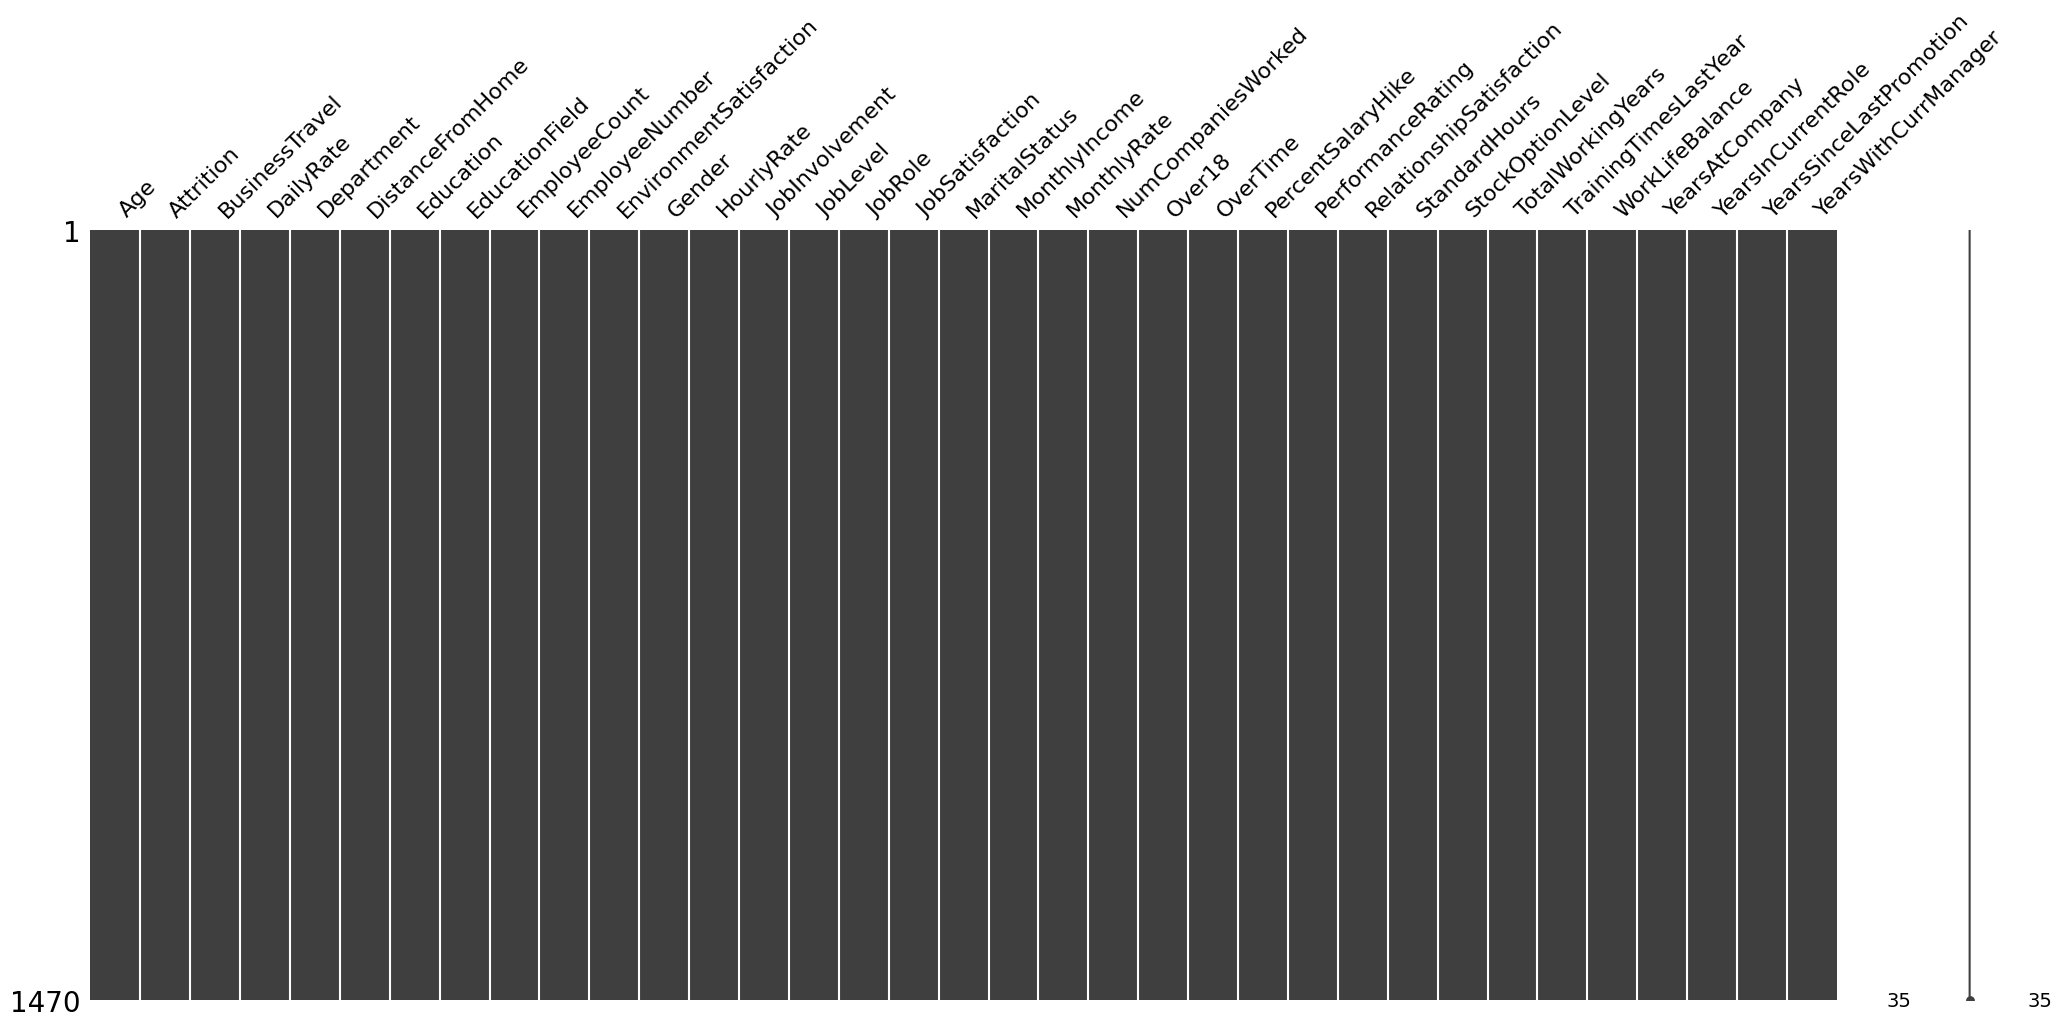

In [300]:
#visualize missing values as a matrix
msno.matrix(emp_data)

Data Preprocessing

In [301]:
# Drop columns that are not useful for prediction
emp_data = emp_data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
#EmployeeCount: This column likely contains a constant value (e.g., 1) for all employees, which does not provide any useful information
#for predicting attrition.

#EmployeeNumber: This column is likely a unique identifier for each employee, which is not relevant for predicting attrition and can be dropped.

#Over18: This column likely indicates whether the employee is over 18 years old, but since the dataset likely contains only adult employees,
#this column does not provide any useful variation and can be dropped.

#StandardHours: This column likely contains a constant value (e.g., 8 hours) for all employees,
#which does not provide any useful information for predicting attrition.
emp_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Data Visualization

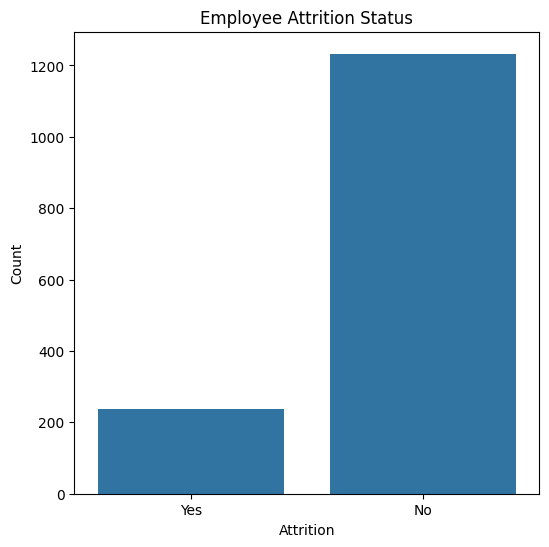

In [302]:
#Employee Attrition Statistics
plt.figure(figsize=(6, 6))
sns.countplot(x='Attrition', data=emp_data)
plt.title('Employee Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Department', ylabel='count'>

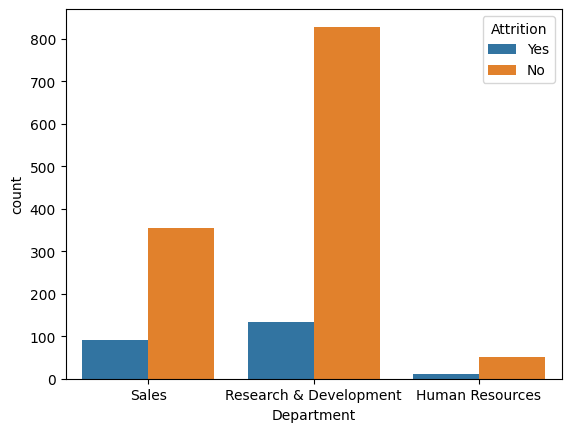

In [303]:
#Attrition by department
sns.countplot(x='Department', hue ='Attrition', data = emp_data)

<Axes: xlabel='Gender', ylabel='count'>

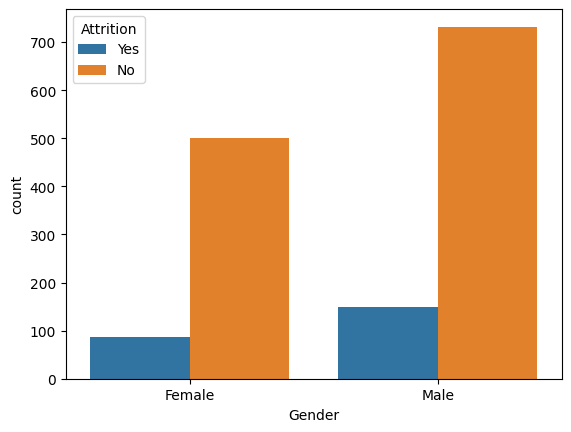

In [304]:
sns.countplot(x='Gender', hue ='Attrition', data = emp_data)

<Axes: xlabel='JobSatisfaction', ylabel='count'>

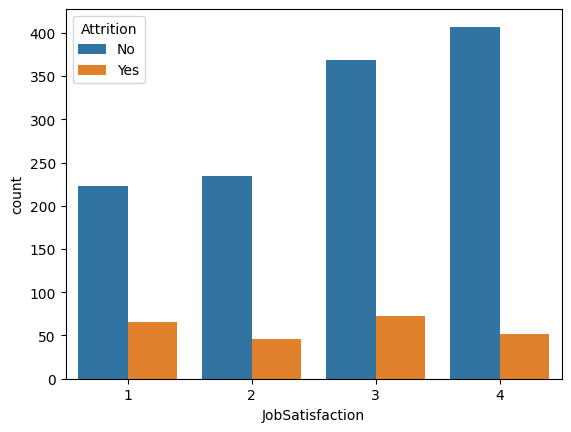

In [305]:
#Attrition by job satisfaction
sns.countplot(x='JobSatisfaction', hue ='Attrition', data = emp_data)

Encoding categorical variables

In [306]:
# Encode categorical variables
le = LabelEncoder()
for column in emp_data.columns:
  if emp_data[column].dtype == object:
    emp_data[column] = le.fit_transform(emp_data[column])

In [307]:
emp_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


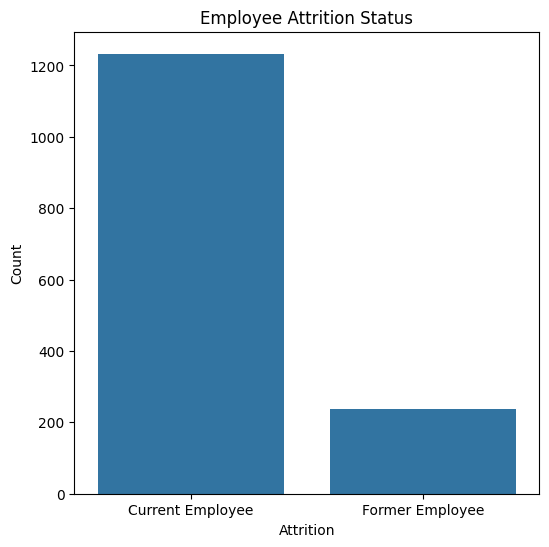

In [308]:
#Employee Attrition Statistics
plt.figure(figsize=(6, 6))
sns.countplot(x='Attrition', data=emp_data)
plt.title('Employee Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Current Employee', 'Former Employee'])
plt.show()

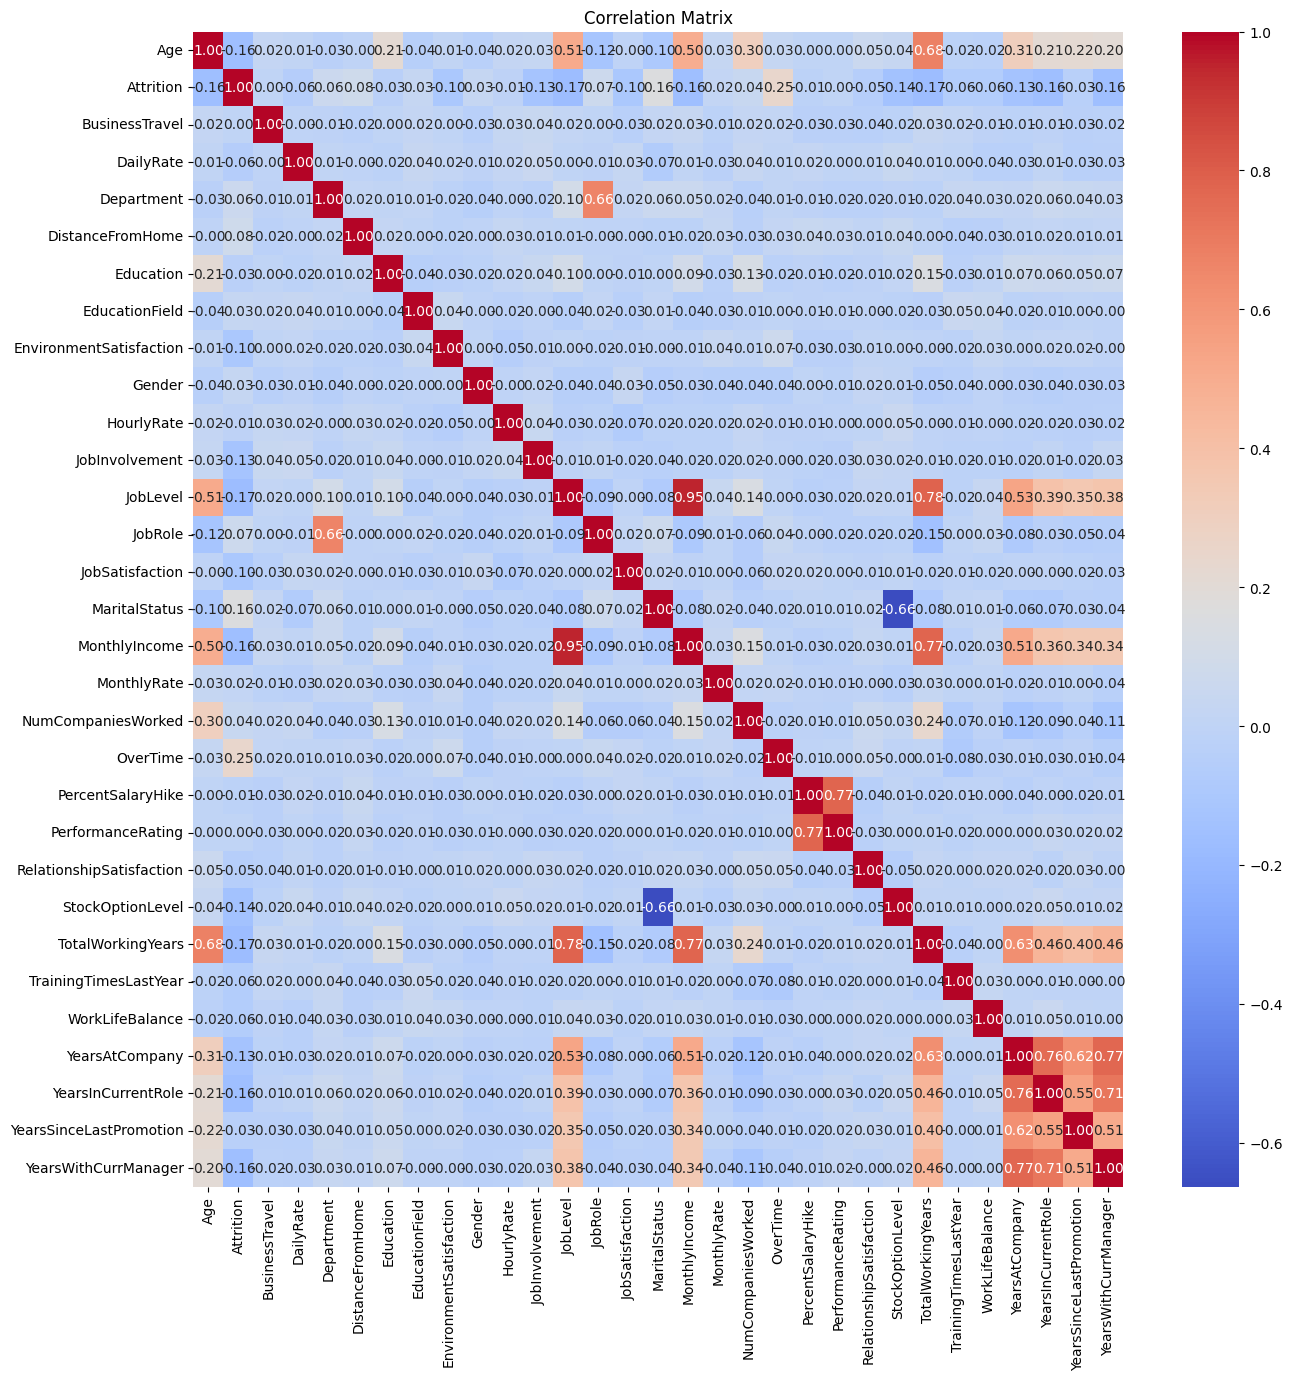

In [309]:
# Correlation matrix
corr_matrix = emp_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [310]:
# Split the dataset into features (X) and target variable (y)
X = emp_data.drop('Attrition', axis=1)
y = emp_data['Attrition']



In [311]:
# Perform standard scaling on numerical features
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [312]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1176, 30)
X_test shape: (294, 30)
y_train shape: (1176,)
y_test shape: (294,)


In [313]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8945578231292517

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294


Confusion Matrix:
[[249   6]
 [ 25  14]]
